In [3]:
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from matplotlib.path import Path
import numpy as np
import os

Figure saved as: ../Figure/01_Basin_Boundaries_MAP.pdf


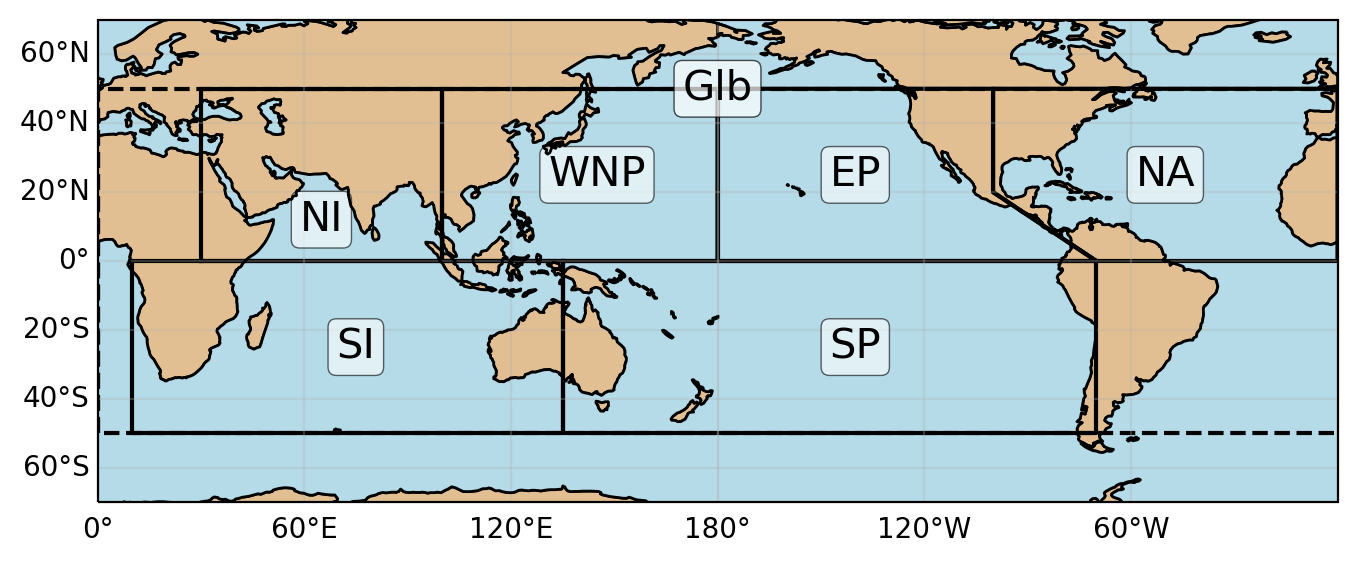

In [4]:
# Define a function to plot cyclone basins on a map
def plot_cyclone_basins(basins, basin_labels, save_path):
    # Create a figure and axes with Cartopy projection
    fig, ax = plt.subplots(figsize=(8, 3.5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
    fig.set_dpi(200)

    # Add land and coastlines
    ax.add_feature(cfeature.LAND, facecolor="burlywood", alpha=0.9, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE, edgecolor='black', zorder=10)
    ax.add_feature(cfeature.OCEAN, facecolor="lightblue", alpha=0.9)

    # Define the extent of the map
    ax.set_extent([0, 360, -70, 70], crs=ccrs.PlateCarree())

    # Define colors for each basin
    basin_colors = {
        'NA': 'red',
        'EP': 'magenta',
        'WNP': 'blue',
        'NI': 'brown',
        'SI': 'green',
        #'SA': 'gray',
        'SP': 'purple',
        'Glb': 'black'
    }

    # Plot each basin
    for basin, coords in basins.items():
        # Get manual label coordinates from dictionary
        label_x, label_y = basin_labels[basin]

        # Use dashed lines for 'Glb' basin
        if basin == 'Glb':
            ax.plot(coords[:, 0], coords[:, 1], label=basin, linestyle='--', linewidth=1.5, color='black', transform=ccrs.PlateCarree())
            # Annotate the basin label with background
            ax.text(label_x, label_y, basin, color=basin_colors[basin], fontsize=15, ha='center', va='center', 
                   transform=ccrs.PlateCarree(),
                   bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.7, edgecolor=basin_colors[basin], linewidth=0.5))
        else:
            ax.plot(coords[:, 0], coords[:, 1], label=basin, linewidth=1.5, color='black', transform=ccrs.PlateCarree())
            # Annotate the basin label with background
            ax.text(label_x, label_y, basin, color='black', fontsize=15, ha='center', va='center', 
                   transform=ccrs.PlateCarree(),
                   bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.6, edgecolor='black', linewidth=0.5))

    # Add gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.3)
    gl.xlabels_top = False

    plt.savefig(save_path, dpi=600, bbox_inches='tight', format='pdf')
    print(f"Figure saved as: {save_path}")    
    
    # Show the plot
    plt.show()

# Define the basin coordinates
basins = {
    'NA': np.array([[-70, 0], [-100, 20], [-100, 50], [0, 50], [0, 0], [-70, 0]]),
    'EP': np.array([[-70, 0], [-100, 20], [-100, 50], [-180, 50], [-180, 0], [-70, 0]]),
    'WNP': np.array([[100, 0], [100, 50], [180, 50], [180, 0], [100, 0]]),
    'NI': np.array([[30, 0], [30, 50], [100, 50], [100, 0], [30, 0]]),
    'SI': np.array([[10, 0], [10, -50], [135, -50], [135, 0], [10, 0]]),
    #'SA': np.array([[10, 0], [10, -50], [-70, -50], [-70, 0], [10, 0]]),
    'SP': np.array([[135, 0], [135, -50], [290, -50], [290, 0], [135, 0]]),
    'Glb': np.array([[0, 50], [0, -50], [360, -50], [360, 50], [0, 50]])
}

# Define manual label coordinates for each basin (longitude, latitude)
basin_labels = {
    'NA': (310, 25),      # Centered in North Atlantic
    'EP': (220, 25),     # Centered in East Pacific  
    'WNP': (145, 25),     # Centered in West North Pacific
    'NI': (65, 12),       # Centered in North Indian
    'SI': (75, -25),      # Centered in South Indian
    'SP': (220, -25),     # Centered in South Pacific
    'Glb': (180, 50)       # Centered globally
}

# Simple save to ../Figure/ (one level up from Script, then into Figure)
os.makedirs('../Figure', exist_ok=True)
save_path = '../Figure/01_Basin_Boundaries_MAP.pdf'

# Plot the cyclone basins on a map and save it
plot_cyclone_basins(basins, basin_labels, save_path=save_path)